# Intro
Recently, I completed a **Practical Skills Module** on **Python Fundamentals** by the CFA Institute.
The course covered the fundamentals of the Python programming language, working with libraries (e.g., pandas), visualizing information, and more.
At the end of the course, we focused on a capstone project: building an optimal portfolio using simulations.

Following a course is one thing; truly internalizing what I learned is another. To achieve this, I plan to work on a few small-scale projects where I can both replicate and expand upon the concepts introduced in the course.

# Spotify Stock Analysis
In this project, I aim to analyze the stock movements of Spotify, the popular music streaming provider. I’ve been a loyal Spotify user for over 15 years and have enjoyed seeing the company grow. Spotify went public in April 2018 through its IPO and has been trading publicly since.

**Here are the questions I want to explore:**
1. *What if I had bought Spotify stock back in April 2018? How much would it be worth now?*
2. *How many days during this period (from April 2018 to now) did the stock experience growth?*

**Key Points of the Project**
1. Import stock data using the Yahoo Finance library.
2. Use the yfinance.Ticker function to gather key information about the company.
3. Check the imported data for any missing items.
4. Calculate daily returns (in %) based on closing prices and rank them by the magnitude of daily movements.
5. Visualize daily returns using Python’s visualization libraries.
6. Answer the key questions posed at the beginning of the project.

## Import stock data

In [195]:
# I will be using Yahoo Finance to get the Stock Data.
# Install required libraries
# %pip install yfinance --upgrade

# Import libraries
# pandas: data analysis and manipulation tool (like Microsoft Excel)
# numpy: numerical analytics
# yfinance: Yahoo Finance library
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
import textwrap # allows to wrap a long text to a certain width

# Also Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Define ticker, start, and end dates
spotify = yf.Ticker("SPOT") # Spotify's ticker
start = dt.datetime(2018,4,3)
end = dt.datetime.now()

df = spotify.history(start=start, end=end, auto_adjust=True) 
# the corporate actions, i.e. adjustments due to stock splits and dividends, are included in the prices.
print(df)
df.to_csv('spotify_data.csv')

                                 Open        High         Low       Close  \
Date                                                                        
2018-04-03 00:00:00-04:00  165.899994  169.000000  148.259995  149.009995   
2018-04-04 00:00:00-04:00  140.000000  148.929993  135.509995  144.220001   
2018-04-05 00:00:00-04:00  149.229996  152.410004  141.250000  143.990005   
2018-04-06 00:00:00-04:00  146.070007  148.729996  144.669998  147.919998   
2018-04-09 00:00:00-04:00  149.500000  151.000000  148.589996  150.000000   
...                               ...         ...         ...         ...   
2025-01-17 00:00:00-05:00  487.000000  490.779999  480.005005  485.529999   
2025-01-21 00:00:00-05:00  497.359985  500.859985  476.519989  487.510010   
2025-01-22 00:00:00-05:00  509.000000  510.839996  493.029999  493.559998   
2025-01-23 00:00:00-05:00  490.000000  501.609985  488.002014  501.500000   
2025-01-24 00:00:00-05:00  507.820007  512.010010  501.475006  510.429993   

## Obtain key information about the company

In [196]:
# Using Yahoo Finance's .Ticker method to gather comprehensive information about Spotify (SPOT).
# The 'info' attribute provides a wealth of data about the company, including key financial metrics, business summary, and operational details.
# I will review the data to extract and highlight interesting insights about the company's performance and history.

spotify.info

{'address1': '5, Place de la Gare',
 'city': 'Luxembourg',
 'zip': '1616',
 'country': 'Luxembourg',
 'website': 'https://www.spotify.com',
 'industry': 'Internet Content & Information',
 'industryKey': 'internet-content-information',
 'industryDisp': 'Internet Content & Information',
 'sector': 'Communication Services',
 'sectorKey': 'communication-services',
 'sectorDisp': 'Communication Services',
 'longBusinessSummary': 'Spotify Technology S.A., together with its subsidiaries, provides audio streaming subscription services worldwide. It operates through two segments, Premium and Ad-Supported. The Premium segment offers unlimited online and offline streaming access to its catalog of music and podcasts without commercial breaks to its subscribers. This segment sells directly to the end users. The Ad-Supported segment provides on-demand online access to its catalog of music and unlimited online access to the catalog of podcasts to its users on their computers, tablets, and compatible 

In [197]:
print('{}'.format(textwrap.fill(spotify.info['longBusinessSummary'], width=100)))
print("The {} of the company is {}. The company's {} is {}.".format(
    spotify.info['companyOfficers'][0]['title'], 
    spotify.info['companyOfficers'][0]['name'],
    spotify.info['companyOfficers'][5]['title'], 
    spotify.info['companyOfficers'][5]['name']))
print('The number of full time employees = {}'.format(spotify.info['fullTimeEmployees']))
print("Company's beta = {}. Since beta > 1, the stock is more volatile than the market.".format(spotify.info['beta']))

Spotify Technology S.A., together with its subsidiaries, provides audio streaming subscription
services worldwide. It operates through two segments, Premium and Ad-Supported. The Premium segment
offers unlimited online and offline streaming access to its catalog of music and podcasts without
commercial breaks to its subscribers. This segment sells directly to the end users. The Ad-Supported
segment provides on-demand online access to its catalog of music and unlimited online access to the
catalog of podcasts to its users on their computers, tablets, and compatible mobile devices. The
company also offers sales, distribution and marketing, contract research and development, and
customer and other support services. Spotify Technology S.A. was incorporated in 2006 and is based
in Luxembourg City, Luxembourg.
The Founder, CEO & Chairman of the company is Mr. Daniel G. Ek. The company's Chief Financial Officer is Mr. Christian  Luiga.
The number of full time employees = 7242
Company's beta =

In [198]:
# Use Pandas to read stock data
stock_df = pd.read_csv('spotify_data.csv')
stock_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2018-04-03 00:00:00-04:00,165.899994,169.000000,148.259995,149.009995,30526500,0.0,0.0
1,2018-04-04 00:00:00-04:00,140.000000,148.929993,135.509995,144.220001,11702900,0.0,0.0
2,2018-04-05 00:00:00-04:00,149.229996,152.410004,141.250000,143.990005,7372800,0.0,0.0
3,2018-04-06 00:00:00-04:00,146.070007,148.729996,144.669998,147.919998,4228100,0.0,0.0
4,2018-04-09 00:00:00-04:00,149.500000,151.000000,148.589996,150.000000,2051400,0.0,0.0
...,...,...,...,...,...,...,...,...
1709,2025-01-17 00:00:00-05:00,487.000000,490.779999,480.005005,485.529999,2021300,0.0,0.0
1710,2025-01-21 00:00:00-05:00,497.359985,500.859985,476.519989,487.510010,2133300,0.0,0.0
1711,2025-01-22 00:00:00-05:00,509.000000,510.839996,493.029999,493.559998,1867100,0.0,0.0
1712,2025-01-23 00:00:00-05:00,490.000000,501.609985,488.002014,501.500000,892700,0.0,0.0


## Check for missing items, gather overall information about the DataFrame

In [199]:
# Count the number of missing values in "stock_df" Pandas DataFrame
# There are no missing values in this DataFrame.
stock_df.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [200]:
# Summarize the structure of the DataFrame to understand its overall composition.
# The .info() method provides details such as the number of rows, columns, data types, 
# non-null values, and memory usage of the dataset (107.3+ KB in this case).

stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1714 entries, 0 to 1713
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1714 non-null   object 
 1   Open          1714 non-null   float64
 2   High          1714 non-null   float64
 3   Low           1714 non-null   float64
 4   Close         1714 non-null   float64
 5   Volume        1714 non-null   int64  
 6   Dividends     1714 non-null   float64
 7   Stock Splits  1714 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 107.3+ KB


## Calculate % Daily Returns

In [201]:
# Calculate daily returns in percentage using the .pct_change() function.
# The function computes the percentage change between the current value and the previous value (lag=1 by default).
# This helps us determine daily price fluctuations for analysis.

stock_df['Daily Return %'] = stock_df['Close'].pct_change(1) * 100
stock_df['Daily Return %'] = stock_df['Daily Return %'].replace(np.nan,0)
stock_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Return %
0,2018-04-03 00:00:00-04:00,165.899994,169.000000,148.259995,149.009995,30526500,0.0,0.0,0.000000
1,2018-04-04 00:00:00-04:00,140.000000,148.929993,135.509995,144.220001,11702900,0.0,0.0,-3.214545
2,2018-04-05 00:00:00-04:00,149.229996,152.410004,141.250000,143.990005,7372800,0.0,0.0,-0.159476
3,2018-04-06 00:00:00-04:00,146.070007,148.729996,144.669998,147.919998,4228100,0.0,0.0,2.729351
4,2018-04-09 00:00:00-04:00,149.500000,151.000000,148.589996,150.000000,2051400,0.0,0.0,1.406167
...,...,...,...,...,...,...,...,...,...
1709,2025-01-17 00:00:00-05:00,487.000000,490.779999,480.005005,485.529999,2021300,0.0,0.0,-0.980952
1710,2025-01-21 00:00:00-05:00,497.359985,500.859985,476.519989,487.510010,2133300,0.0,0.0,0.407804
1711,2025-01-22 00:00:00-05:00,509.000000,510.839996,493.029999,493.559998,1867100,0.0,0.0,1.240998
1712,2025-01-23 00:00:00-05:00,490.000000,501.609985,488.002014,501.500000,892700,0.0,0.0,1.608721


In [202]:
# Generate a statistical summary of the stock data using the describe() method.
# This includes key metrics such as mean, standard deviation, min, max, and quartiles for each numeric column.
# Observations:
# - The highest stock price during this period was $512.01.
# - The lowest stock price during this period was $69.29.
# Rounding the summary statistics to 2 decimal places for better readability.

stock_df.describe().round(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Return %
count,1714.00,1714.00,1714.00,1714.00,1714.00,1714.0,1714.0,1714.00
mean,198.83,202.49,195.14,198.88,1847044.52,0.0,0.0,0.12
std,88.13,89.41,86.75,88.09,1646455.72,0.0,0.0,2.96
min,71.93,72.33,69.29,71.05,394500.00,0.0,0.0,-16.76
25%,136.58,139.42,134.02,137.03,1126000.00,0.0,0.0,-1.51
50%,161.74,165.11,158.97,161.41,1471650.00,0.0,0.0,0.14
75%,254.97,259.78,250.27,254.59,2029175.00,0.0,0.0,1.66
max,509.00,512.01,501.48,510.43,30526500.00,0.0,0.0,16.17


In [203]:
# Define a function that performs interactive data visualisation using Plotly Express

def line_financial_data(df,title):
    
    fig = px.line(title=title)

    # in case there are more than one column of financial data to be displayed
    # use the loop to plot all of them

    for i in df.columns[1:]:
        fig.add_scatter(x = df['Date'], y = df[i], name = i)
        fig.update_traces(line_width = 2)
        fig.update_layout({'plot_bgcolor': "white"})

    fig. show()


In [204]:
# Plot the daily closing price on a line graph
line_financial_data(stock_df[['Date','Close']], 'Spotify (SPOT) Stock Price [$]')

In [205]:
# Plot daily returns on a line
line_financial_data(stock_df[['Date','Daily Return %']], 'Spotify (SPOT) Daily Returns [%]')

In [206]:
# Define a function to classify stock performance as "Growth" or "Decline" based on daily returns.
# This function accepts a daily percentage change (growth) as input.
# - If the growth is positive (> 0), the function returns "Growth".
# - Otherwise, it returns "Decline".
# The function will be used to categorize each day's performance for further analysis.

def growth_or_fall(growth):
    if growth > 0:
        return "Growth"
    else:
        return "Decline"

In [207]:
# Define a function that would assign the ranking below to each day based on the column 'Daily Return'
# Insignificant Change 
# Positive Change
# Large Positive Change
# Bull Run
# Negative Change
# Large Negative Change
# Bear Sell Off
# Infignificant change is between 0 and 0.2, a large change is between 3 and 7.

def assign_ranking(daily_return):
    thresholds = [0.2, 3, 7]
    if daily_return > -thresholds[0] and daily_return <= thresholds[0]:
        return 'Insignificant change'
    elif daily_return > thresholds[0] and daily_return <= thresholds[1]:
        return 'Positive Change'
    elif daily_return > thresholds[1] and daily_return <= thresholds[2]:
        return 'Large Positive Change'
    elif daily_return > thresholds[2]:
        return 'Bull Run'
    elif daily_return < -thresholds[0] and daily_return >= -thresholds[1]:
        return 'Negative Change'
    elif daily_return < -thresholds[1] and daily_return >= -thresholds[2]:
        return 'Large Negative Change'
    elif daily_return < -thresholds[2]* (-1):
        return 'Bear Sell Off'

In [208]:
# Apply both functions to the "Daily Return" Column. Plase the results in "Phases" and "Return Ranking" columns.
stock_df['Phases'] = stock_df['Daily Return %'].apply(growth_or_fall)
stock_df['Return Ranking'] = stock_df['Daily Return %'].apply(assign_ranking)
stock_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Daily Return %,Phases,Return Ranking
0,2018-04-03 00:00:00-04:00,165.899994,169.000000,148.259995,149.009995,30526500,0.0,0.0,0.000000,Decline,Insignificant change
1,2018-04-04 00:00:00-04:00,140.000000,148.929993,135.509995,144.220001,11702900,0.0,0.0,-3.214545,Decline,Large Negative Change
2,2018-04-05 00:00:00-04:00,149.229996,152.410004,141.250000,143.990005,7372800,0.0,0.0,-0.159476,Decline,Insignificant change
3,2018-04-06 00:00:00-04:00,146.070007,148.729996,144.669998,147.919998,4228100,0.0,0.0,2.729351,Growth,Positive Change
4,2018-04-09 00:00:00-04:00,149.500000,151.000000,148.589996,150.000000,2051400,0.0,0.0,1.406167,Growth,Positive Change
...,...,...,...,...,...,...,...,...,...,...,...
1709,2025-01-17 00:00:00-05:00,487.000000,490.779999,480.005005,485.529999,2021300,0.0,0.0,-0.980952,Decline,Negative Change
1710,2025-01-21 00:00:00-05:00,497.359985,500.859985,476.519989,487.510010,2133300,0.0,0.0,0.407804,Growth,Positive Change
1711,2025-01-22 00:00:00-05:00,509.000000,510.839996,493.029999,493.559998,1867100,0.0,0.0,1.240998,Growth,Positive Change
1712,2025-01-23 00:00:00-05:00,490.000000,501.609985,488.002014,501.500000,892700,0.0,0.0,1.608721,Growth,Positive Change


In [209]:
# The stock was growing on 897 days during the period.
growth_phase = stock_df['Phases'].value_counts()
growth_phase

Phases
Growth     897
Decline    817
Name: count, dtype: int64

In [210]:
# Summarise the growth/fall rates based on their significance.
ranking_summary = stock_df['Return Ranking'].value_counts()
ranking_summary

Return Ranking
Positive Change          625
Negative Change          553
Large Negative Change    184
Large Positive Change    184
Insignificant change     116
Bull Run                  31
Bear Sell Off             21
Name: count, dtype: int64

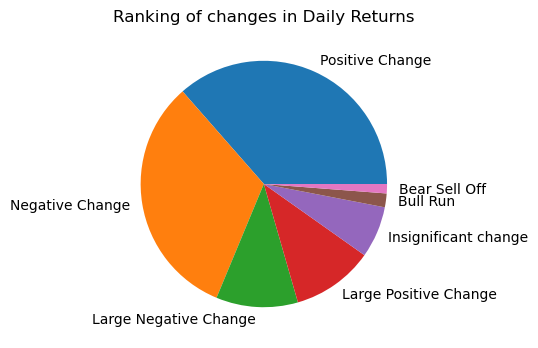

In [211]:
# Plot a pie chart using Matplotlib Library
plt.figure(figsize = (4, 4))
ranking_summary.plot(kind = 'pie', title="Ranking of changes in Daily Returns");
plt.ylabel('') #removes the default label
plt.show()

In [212]:
# I also want to know how many % the stock has growth compared to the closing price on the first day of trading.
# (Today's Price - Initial Price) / Initial Price

stock_return_over_the_period = (stock_df.iloc[-1]['Close']-stock_df.iloc[0]['Close'])/stock_df.iloc[0]['Close'] * 100
print("The closing price on the first day = ${}. The closing price on the last day of the observation period = ${}.".format(stock_df.iloc[0]['Close'].round(2),stock_df.iloc[-1]['Close'].round(2)))
print('During the observation period the stock has grown {}%.'.format(stock_return_over_the_period.round(2)))

The closing price on the first day = $149.01. The closing price on the last day of the observation period = $510.43.
During the observation period the stock has grown 242.55%.


In [214]:
# Imagine I invested $1000 in 2018. How much would my portfolio be worth today?
FV = 1000 * (1 + stock_return_over_the_period/100)
print("A $1,000 investment would now be valued at appx ${}.".format(FV.round(1)))

A $1,000 investment would now be valued at appx $3425.5.


# Summary
1. I was able to import the financial data about stock movements from the day the company went public until now. 
2. I went though the company's basic information and extracted the most important points.
3. I checked the data for missing values. No missing values were identified.
4. I calculated the daily returns and sorted them according to their magnitude.
5. I created three graphs: closing price daily, daily returns, pie chart of the daily returns.
6. Here are the answers to the questions posed in the beginning:
    1. *What if I had bought Spotify stock back in April 2018? How much would it be worth now?*
        - **The closing price on the first day = $149.01. The closing price on the last day of the observation period = $510.43. During the observation period the stock has grown 242.55%.**
        - **An initial investment of $1,000 at the IPO price of $149.01 would have resulted in the purchase of approximately 6.71 shares. With the stock's final closing price at $510.43, this investment would now be valued at approximately $3,425.50, reflecting a substantial 242.55% increase over the observation period.**
    2. *How many days during this period (from April 2018 to now) did the stock experience growth?*
        - **The stock was growing on 897 days during the period.**